# Case Study: Data Mining in Yelp Data


HARSHAL BHAVANE 


Download the Yelp dataset in Case Study. 

**Here is an example of the data format:**
### Business Objects

Business objects contain basic information about local businesses. The fields are as follows:

```json
{
  'type': 'business',
  'business_id': (a unique identifier for this business),
  'name': (the full business name),
  'neighborhoods': (a list of neighborhood names, might be empty),
  'full_address': (localized address),
  'city': (city),
  'state': (state),
  'latitude': (latitude),
  'longitude': (longitude),
  'stars': (star rating, rounded to half-stars),
  'review_count': (review count),
  'photo_url': (photo url),
  'categories': [(localized category names)]
  'open': (is the business still open for business?),
  'schools': (nearby universities),
  'url': (yelp url)
}
```
### Checkin Objects
```json
{
    'type': 'checkin',
    'business_id': (encrypted business id),
    'checkin_info': {
        '0-0': (number of checkins from 00:00 to 01:00 on all Sundays),
        '1-0': (number of checkins from 01:00 to 02:00 on all Sundays),
        ...
        '14-4': (number of checkins from 14:00 to 15:00 on all Thursdays),
        ...
        '23-6': (number of checkins from 23:00 to 00:00 on all Saturdays)
    }, # if there was no checkin for a hour-day block it will not be in the dict
}
```

# Problem: pick a data science problem that you plan to solve using Yelp Data

* The problem should be important and interesting, which has a potential impact in some area.
* The problem should be solvable using yelp data and data science solutions.

Please briefly describe in the following cell: what problem are you trying to solve? why this problem is important and interesting?

##Helping coustemers and businesses using the data 

Indeed, Yelp has become one of the most important sources of information for customers when it comes to choosing a restaurant to visit. Customers can read reviews from other people who have visited the restaurant before and see the overall rating of the restaurant. This information can help customers make an informed decision on where to eat and what to expect.

For restaurant owners, Yelp can be a double-edged sword. Positive reviews and high ratings can attract more customers and increase revenue. On the other hand, negative reviews and low ratings can harm the restaurant's reputation and lead to a decrease in customers and revenue. Therefore, it is crucial for restaurant owners to understand what makes a restaurant receive good or bad reviews on Yelp and take action accordingly.

To receive good reviews on Yelp, restaurants should focus on providing excellent customer service, serving high-quality food, maintaining a clean and comfortable environment, and responding to customer feedback promptly and professionally. These factors can help create a positive experience for customers and increase the likelihood of them leaving a positive review.

On the other hand, restaurants that receive negative reviews on Yelp may need to improve their customer service, food quality, and overall experience. It is also important for restaurant owners to respond to negative reviews promptly and professionally, addressing the customer's concerns and taking steps to prevent similar issues from happening in the future.

In conclusion, Yelp has become a critical tool for customers and restaurant owners alike. By understanding what makes a restaurant receive good or bad reviews on Yelp, restaurant owners can improve their business and provide a better experience for their customers, ultimately leading to increased revenue and success.



# Data Collection/Processing: 

In [1]:

# import matplotlib.pyplot as plt
# df['date'] = pd.to_datetime(df['date'])
# df = df.set_index('date')
# plt.plot(df['review'].resample('M').count())
# plt.xlabel('Year')
# plt.ylabel('Number of reviews')
# plt.title('Number of reviews per month')
# plt.show()





In [2]:
import pandas as pd
import numpy as np
b_data = pd.read_json("yelp_academic_dataset_business.json", lines=True)
chk_data =  pd.read_json("yelp_academic_dataset_checkin.json", lines=True)

In [3]:
print("shape of yelp business data", b_data.shape)
b_data.head()

shape of yelp business data (188593, 15)


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,,1314 44 Avenue NE,Calgary,AB,T2E 6L6,51.091813,-114.031675,4.0,24,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'..."
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,,,Henderson,NV,89002,35.960734,-114.939821,4.5,3,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...","Chicken Wings, Burgers, Caterers, Street Vendo...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0..."
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montréal,QC,H2G 1K7,45.540503,-73.599300,4.0,5,0,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...","Breakfast & Brunch, Restaurants, French, Sandw...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
3,bFzdJJ3wp3PZssNEsyU23g,Geico Insurance,,211 W Monroe St,Phoenix,AZ,85003,33.449999,-112.076979,1.5,8,1,None,"Insurance, Financial Services",None
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,,2005 Alyth Place SE,Calgary,AB,T2H 0N5,51.035591,-114.027366,2.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Home & Garden, Nurseries & Gardening, Shopping...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."


In [4]:
b_data.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours'],
      dtype='object')

In [5]:
b_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188593 entries, 0 to 188592
Data columns (total 15 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   188593 non-null  object 
 1   name          188593 non-null  object 
 2   neighborhood  188593 non-null  object 
 3   address       188593 non-null  object 
 4   city          188593 non-null  object 
 5   state         188593 non-null  object 
 6   postal_code   188593 non-null  object 
 7   latitude      188587 non-null  float64
 8   longitude     188587 non-null  float64
 9   stars         188593 non-null  float64
 10  review_count  188593 non-null  int64  
 11  is_open       188593 non-null  int64  
 12  attributes    162807 non-null  object 
 13  categories    188052 non-null  object 
 14  hours         143791 non-null  object 
dtypes: float64(3), int64(2), object(10)
memory usage: 21.6+ MB


In [6]:
b_data = b_data.dropna()
print("shape of yelp business data after dropping nulls and checking duplicates- ", b_data.shape)
b_data.head()

shape of yelp business data after dropping nulls and checking duplicates-  (127442, 15)


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,,1314 44 Avenue NE,Calgary,AB,T2E 6L6,51.091813,-114.031675,4.0,24,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'..."
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,,,Henderson,NV,89002,35.960734,-114.939821,4.5,3,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...","Chicken Wings, Burgers, Caterers, Street Vendo...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0..."
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montréal,QC,H2G 1K7,45.540503,-73.599300,4.0,5,0,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...","Breakfast & Brunch, Restaurants, French, Sandw...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'..."
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,,2005 Alyth Place SE,Calgary,AB,T2H 0N5,51.035591,-114.027366,2.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Home & Garden, Nurseries & Gardening, Shopping...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
5,45bWSZtniwPRiqlivpS8Og,The Coffee Bean & Tea Leaf,,"20235 N Cave Creek Rd, Ste 1115",Phoenix,AZ,85024,33.671375,-112.030017,4.0,63,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Coffee & Tea, Food","{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'..."


In [7]:
chk_data.isnull().sum()

checkin_info    0
type            0
business_id     0
dtype: int64

In [8]:
rating_points = [0, 2.9, 3.6, 5]
label_names = ['bad', 'average', 'good']

# create new column 'rating_type'
b_data['rating_type'] = pd.cut(b_data['stars'], bins = rating_points, labels = label_names)

display(b_data.head())

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,rating_type
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,,1314 44 Avenue NE,Calgary,AB,T2E 6L6,51.091813,-114.031675,4.0,24,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",good
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,,,Henderson,NV,89002,35.960734,-114.939821,4.5,3,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...","Chicken Wings, Burgers, Caterers, Street Vendo...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",good
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montréal,QC,H2G 1K7,45.540503,-73.599300,4.0,5,0,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...","Breakfast & Brunch, Restaurants, French, Sandw...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",good
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,,2005 Alyth Place SE,Calgary,AB,T2H 0N5,51.035591,-114.027366,2.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Home & Garden, Nurseries & Gardening, Shopping...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",bad
5,45bWSZtniwPRiqlivpS8Og,The Coffee Bean & Tea Leaf,,"20235 N Cave Creek Rd, Ste 1115",Phoenix,AZ,85024,33.671375,-112.030017,4.0,63,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Coffee & Tea, Food","{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",good


# Data Exploration: Exploring the Yelp Dataset

**(1) Finding the most popular business categories:** 
* print the top 10 most popular business categories in the dataset and their counts in a table (i.e., how many business objects in each category). Here we say a category is "popular" if there are many business objects in this category (such as 'restaurants').

In [9]:
pip install collections


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement collections
ERROR: No matching distribution found for collections


In [10]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary


categories = b_data["categories"].str.split(", ")
categories = categories.explode()
category_counts = categories.value_counts()
top_categories = category_counts.head(10)

top_categories_table = pd.DataFrame({"Category": top_categories.index, "Count": top_categories.values})
display(top_categories_table)


,Category,Count
0,Restaurants,42730
1,Shopping,23095
2,Food,20674
3,Beauty & Spas,15146
4,Home Services,14158
5,Health & Medical,12536
6,Nightlife,9993
7,Local Services,9985
8,Bars,8988
9,Automotive,7433


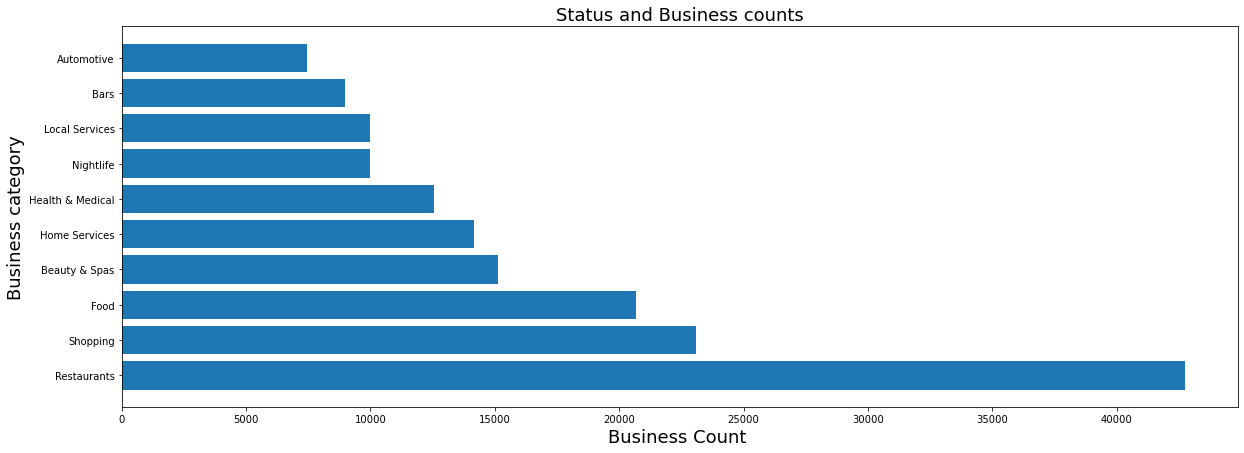

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
plt.figure(figsize=(20, 7))
x=top_categories.index
y=top_categories.values
# sns.barplot(x,y)
plt.barh(x,y)
plt.title('Status and Business counts', fontsize=18)
plt.ylabel('Business category', fontsize=18)
plt.xlabel('Business Count ', fontsize=18)
# print("Status and Business Count ")
plt.show()

**(2) Find the most popular business objects** 
* print the top 10 most popular business objects/IDs in the dataset and their counts (i.e., how many checkins in total for each business object).  Here we say a business object is "popular" if the business object attracts a large number of checkins from the users.

In [12]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary
chk_data['total'] = chk_data.apply(lambda row: np.array(list(row['checkin_info']. values())).sum(),axis=1) 
top_checkin = chk_data.sort_values('total', ascending=False) 
top_checkin.head (1000)

,checkin_info,type,business_id,total
12285,"{'22-6': 437, '22-5': 178, '22-4': 815, '22-3'...",checkin,jf67Z1pnwElRSXllpQHiJg,77320
2905,"{'22-6': 553, '22-5': 155, '22-4': 348, '22-3'...",checkin,hW0Ne_HTHEAgGF1rAdmR-g,68711
828,"{'0-3': 1, '22-6': 9, '22-5': 3, '22-4': 7, '2...",checkin,3Q0QQPnHcJuX1DLCL9G9Cg,29893
31015,"{'22-6': 181, '22-5': 475, '22-4': 490, '22-3'...",checkin,AtjsjFzalWqJ7S9DUFQ4bw,27356
25634,"{'4-5': 46, '22-6': 138, '22-5': 176, '22-4': ...",checkin,JpHE7yhMS5ehA9e8WG_ETg,18208
...,...,...,...,...
27452,"{'22-2': 1, '19-6': 1, '19-3': 2, '11-5': 26, ...",checkin,CdqTxe171tKTOkk8T15GGA,1238
15464,"{'22-6': 2, '22-5': 3, '22-4': 6, '22-3': 2, '...",checkin,Rzg2-ugIG_UxQCN_JqXDcA,1237
3866,"{'22-5': 1, '22-4': 2, '22-3': 5, '22-2': 3, '...",checkin,DPO-EDWSNXAjQSEFGpyRWw,1235
21067,"{'22-5': 2, '22-4': 3, '22-3': 1, '22-1': 1, '...",checkin,IXssz6N-sgX-RrVjThcMaw,1235


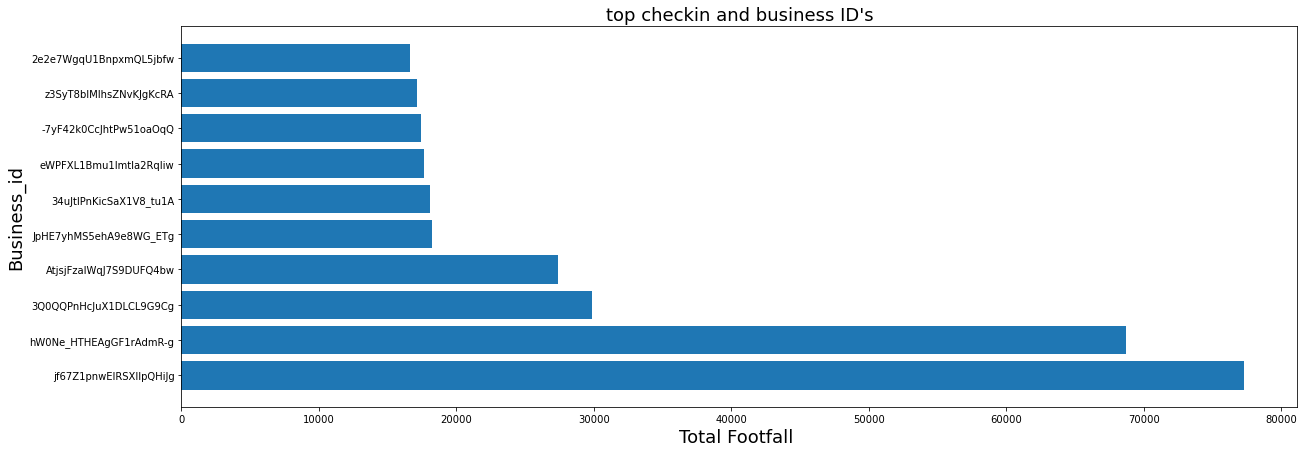

In [13]:
plt.figure(figsize=(20, 7))
x = "business_id"
y = "total"
# sns.barplot(x,y, data = top_checkin[:10])
plt.title('top checkin and business ID\'s', fontsize=18)
plt.ylabel('Business_id', fontsize=18)
plt.xlabel('Total Footfall ', fontsize=18)
plt.barh(x,y,data = top_checkin[:10])
plt.show()

In [14]:
b_data.describe()

,latitude,longitude,stars,review_count,is_open
count,127442.000000,127442.000000,127442.000000,127442.000000,127442.000000
mean,38.351556,-97.933446,3.754218,41.785487,0.851532
std,5.013253,17.186358,0.940438,124.178976,0.355564
min,-71.753941,-180.000000,1.000000,3.000000,0.000000
25%,33.623650,-112.275639,3.000000,5.000000,1.000000
50%,36.127552,-111.791828,4.000000,12.000000,1.000000
75%,43.183561,-80.021961,4.500000,34.000000,1.000000
max,85.051129,115.086769,5.000000,7968.000000,1.000000


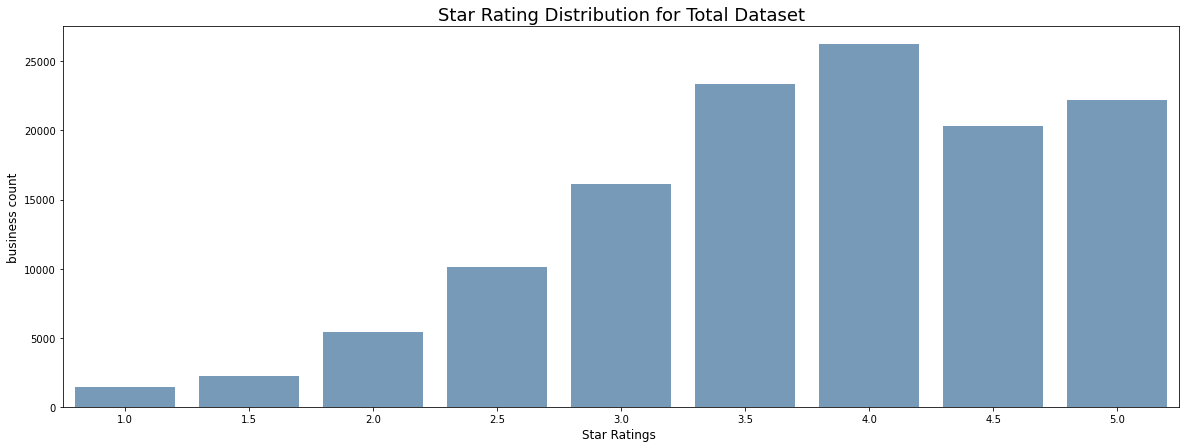

In [15]:
x = b_data["stars"].value_counts().sort_index()
#plot hthe ratings of business
plt.figure(figsize=(20, 7))
# x=x.index
# y=x.values
# alpha=0.8
rate= sns.barplot(x=x.index, y=x.values, alpha=0.8,color='steelblue')
plt.title("Star Rating Distribution for Total Dataset", fontsize=18)
plt.ylabel('business count', fontsize=12)
plt.xlabel('Star Ratings ', fontsize=12)
# plt.barh(x,y, alpha=0.8)
# plt.bar(x, y, alpha=0.8, width = 0.4)
plt.show()

**(3) Other explorations you would like to present** 


In [16]:
b_data.describe()

,latitude,longitude,stars,review_count,is_open
count,127442.000000,127442.000000,127442.000000,127442.000000,127442.000000
mean,38.351556,-97.933446,3.754218,41.785487,0.851532
std,5.013253,17.186358,0.940438,124.178976,0.355564
min,-71.753941,-180.000000,1.000000,3.000000,0.000000
25%,33.623650,-112.275639,3.000000,5.000000,1.000000
50%,36.127552,-111.791828,4.000000,12.000000,1.000000
75%,43.183561,-80.021961,4.500000,34.000000,1.000000
max,85.051129,115.086769,5.000000,7968.000000,1.000000


In [17]:
print("top states")
b_data["state"].value_counts().head(10)

top states


AZ    39488
NV    24312
ON    20903
NC     9851
OH     9176
PA     7294
QC     5792
AB     4804
WI     3685
IL     1269
Name: state, dtype: int64

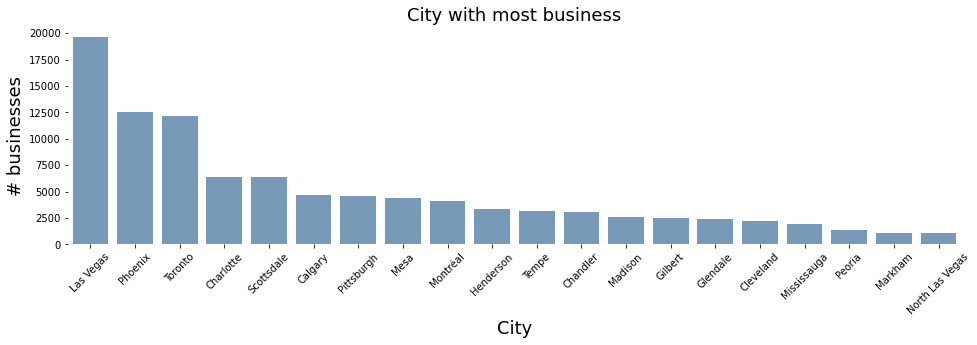

In [18]:
x = b_data['city'].value_counts().sort_values(ascending=False)
x = x.iloc[0:20]
plt.figure(figsize=(16,4))
citybar = sns.barplot(x=x.index, y=x.values, alpha=0.8, color='steelblue')
plt.title("City with most business", fontsize=18)
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.ylabel('# businesses', fontsize=18)
plt.xlabel('City', fontsize=18)
# plt.bar(x=x.index, y=x.values, alpha=0.8)
sns.despine(left=True, bottom=True)

plt.show()

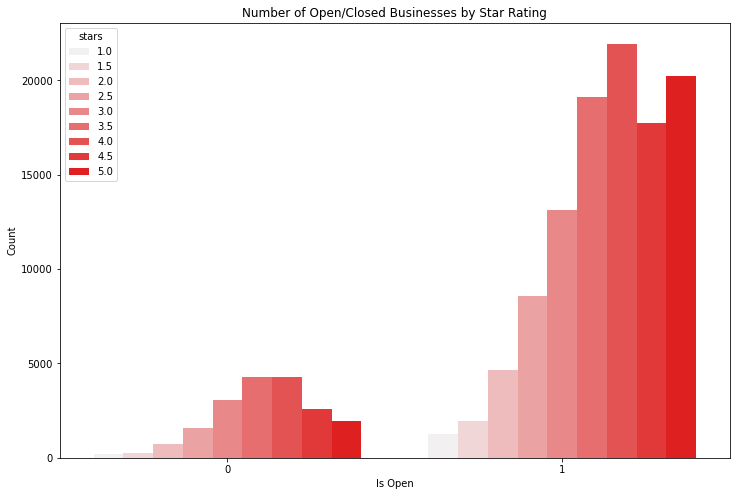

In [19]:
plt.figure(figsize=(12,8))
op_cl = sns.countplot(hue='stars', x='is_open', data = b_data,color='red')
op_cl.set_ylabel('Count')
op_cl.set_xlabel('Is Open')
op_cl.set_title('Number of Open/Closed Businesses by Star Rating')

plt.show()

# The Solution: implement a data science solution to the problem you are trying to solve.

Briefly describe the idea of your solution to the problem in the following cell:









One approach to address this issue is to leverage machine learning algorithms to assess Yelp review data and categorize restaurants as either good or bad depending on their ratings and reviews. This categorization can take into account a range of factors, such as the tone of the reviews, the frequency and gravity of negative feedback, or the ratings assigned by reviewers. The insights gleaned from this analysis can be employed to offer customers more precise and pertinent information when selecting where to dine, as well as assist restaurant owners in enhancing their business through customer feedback.



Write codes to implement the solution in python:

In [20]:

b_data_copy = b_data.copy()
b_data_copy.head()


,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,rating_type
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,,1314 44 Avenue NE,Calgary,AB,T2E 6L6,51.091813,-114.031675,4.0,24,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",good
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,,,Henderson,NV,89002,35.960734,-114.939821,4.5,3,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...","Chicken Wings, Burgers, Caterers, Street Vendo...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",good
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montréal,QC,H2G 1K7,45.540503,-73.599300,4.0,5,0,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...","Breakfast & Brunch, Restaurants, French, Sandw...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",good
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,,2005 Alyth Place SE,Calgary,AB,T2H 0N5,51.035591,-114.027366,2.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Home & Garden, Nurseries & Gardening, Shopping...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",bad
5,45bWSZtniwPRiqlivpS8Og,The Coffee Bean & Tea Leaf,,"20235 N Cave Creek Rd, Ste 1115",Phoenix,AZ,85024,33.671375,-112.030017,4.0,63,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Coffee & Tea, Food","{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",good


In [21]:
b_data_copy.dtypes

business_id       object
name              object
neighborhood      object
address           object
city              object
state             object
postal_code       object
latitude         float64
longitude        float64
stars            float64
review_count       int64
is_open            int64
attributes        object
categories        object
hours             object
rating_type     category
dtype: object

In [22]:
from sklearn.preprocessing import LabelEncoder

# coverting categorical features to numericals with LabelEncoder
categorical = ['state', 'rating_type']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    b_data_copy[column] = le.fit_transform(b_data_copy[column])

b_data_copy.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours,rating_type
0,Apn5Q_b6Nz61Tq4XzPdf9A,Minhas Micro Brewery,,1314 44 Avenue NE,Calgary,2,T2E 6L6,51.091813,-114.031675,4.0,24,1,"{'BikeParking': 'False', 'BusinessAcceptsCredi...","Tours, Breweries, Pizza, Restaurants, Food, Ho...","{'Monday': '8:30-17:0', 'Tuesday': '11:0-21:0'...",2
1,AjEbIBw6ZFfln7ePHha9PA,CK'S BBQ & Catering,,,Henderson,31,89002,35.960734,-114.939821,4.5,3,0,"{'Alcohol': 'none', 'BikeParking': 'False', 'B...","Chicken Wings, Burgers, Caterers, Street Vendo...","{'Friday': '17:0-23:0', 'Saturday': '17:0-23:0...",2
2,O8S5hYJ1SMc8fA4QBtVujA,La Bastringue,Rosemont-La Petite-Patrie,1335 rue Beaubien E,Montréal,40,H2G 1K7,45.540503,-73.599300,4.0,5,0,"{'Alcohol': 'beer_and_wine', 'Ambience': '{'ro...","Breakfast & Brunch, Restaurants, French, Sandw...","{'Monday': '10:0-22:0', 'Tuesday': '10:0-22:0'...",2
4,8USyCYqpScwiNEb58Bt6CA,Action Engine,,2005 Alyth Place SE,Calgary,2,T2H 0N5,51.035591,-114.027366,2.0,4,1,{'BusinessAcceptsCreditCards': 'True'},"Home & Garden, Nurseries & Gardening, Shopping...","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ...",1
5,45bWSZtniwPRiqlivpS8Og,The Coffee Bean & Tea Leaf,,"20235 N Cave Creek Rd, Ste 1115",Phoenix,6,85024,33.671375,-112.030017,4.0,63,1,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Coffee & Tea, Food","{'Monday': '5:30-20:0', 'Tuesday': '5:30-20:0'...",2


In [23]:
b_data_copy.columns

Index(['business_id', 'name', 'neighborhood', 'address', 'city', 'state',
       'postal_code', 'latitude', 'longitude', 'stars', 'review_count',
       'is_open', 'attributes', 'categories', 'hours', 'rating_type'],
      dtype='object')

In [24]:
X = b_data_copy[['state', 'latitude', 'longitude', 'stars', 'review_count', 'is_open']]
y = b_data_copy['rating_type']
X.shape, y.shape


((127442, 6), (127442,))

In [25]:
ML_Model = []
r2 = []
mse = []
rmse = []

def final_result(model, a,b,c,):
    ML_Model.append(model)
    r2.append(round(a, 3))
    mse.append(round(b, 3))
    rmse.append(round(c, 3))

In [26]:
X.columns

Index(['state', 'latitude', 'longitude', 'stars', 'review_count', 'is_open'], dtype='object')

In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X[['state', 'latitude', 'longitude', 'stars', 'review_count', 'is_open']] = scaler.fit_transform(X[['state', 'latitude', 'longitude', 'stars', 'review_count', 'is_open']])

C:\Users\LENOVO\anaconda3\lib\site-packages\pandas\core\frame.py:3673: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((101953, 6), (25489, 6))

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.metrics import accuracy_score

ML_Model = []
r2 = []
mse = []
rmse = []

def Final_result(model, a,b,c,):
    ML_Model.append(model)
    r2.append(round(a, 3))
    mse.append(round(b, 3))
    rmse.append(round(c, 3))

In [30]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
print("Random Forest accuracy: ", acc_rf)
rf_df = pd.DataFrame({"Actual": y_test, "Predict": y_pred_rf})
display(rf_df.head(10))

Random Forest accuracy:  1.0


,Actual,Predict
170617,0,0
83614,0,0
91044,0,0
35123,0,0
154425,0,0
27453,2,2
19844,2,2
50003,1,1
51220,1,1
20535,0,0


In [31]:
forest_r2 = r2_score(y_test, y_pred_rf)
forest_mse = mean_squared_error(y_test, y_pred_rf)
forest_rmse = np.sqrt(forest_mse)
print('Random Forest R2 Score: {0} \nRandom Forest MSE: {1}, \nRandom Forest RMSE:{2}'.format(forest_r2, forest_mse, forest_rmse))

Random Forest R2 Score: 1.0 
Random Forest MSE: 0.0, 
Random Forest RMSE:0.0


In [32]:
Final_result('Random Forest', forest_r2, forest_mse, forest_rmse)

In [33]:
h = GaussianNB()
h.fit(X_train, y_train)
y_pred_h = h.predict(X_test)
acc_h = accuracy_score(y_test, y_pred_h)
print("Naive Bayes accuracy: ", acc_h)
nb_df = pd.DataFrame({"Actual": y_test, "Predict": y_pred_h})
display(nb_df.head(10))

Naive Bayes accuracy:  0.9978422064419946


,Actual,Predict
170617,0,0
83614,0,0
91044,0,0
35123,0,0
154425,0,0
27453,2,2
19844,2,2
50003,1,1
51220,1,1
20535,0,0


In [34]:
h_r2 = r2_score(y_test, y_pred_h)
h_mse = mean_squared_error(y_test, y_pred_h)
h_rmse = np.sqrt(h_mse)
print('Naive Bayes R2 Score: {0} \nNaive Bayes MSE: {1}, \nRNaive Bayes RMSE:{2}'.format(h_r2, h_mse, h_rmse))

Naive Bayes R2 Score: 0.9915292631976799 
Naive Bayes MSE: 0.006748008945035113, 
RNaive Bayes RMSE:0.08214626555745011


In [35]:
Final_result('Naive Bayes', h_r2, h_mse, h_rmse)

In [36]:
#Support Vector machines
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
print("Support Vector Machines accuracy: ", acc_svm)
svm_df = pd.DataFrame({"Actual": y_test, "Predict": y_pred_svm})
display(svm_df)

Support Vector Machines accuracy:  0.9996076738985444


,Actual,Predict
170617,0,0
83614,0,0
91044,0,0
35123,0,0
154425,0,0
...,...,...
11735,2,2
153578,2,2
23736,0,0
159142,0,0


In [37]:
svm_r2 = r2_score(y_test, y_pred_svm)
svm_mse = mean_squared_error(y_test, y_pred_svm)
svm_rmse = np.sqrt(svm_mse)
print('Support Vector Machines R2 Score: {0} \nSupport Vector Machines MSE: {1}, \nSupport Vector Machines RMSE:{2}'.format(svm_r2, svm_mse, svm_rmse))

Support Vector Machines R2 Score: 0.9990642790741623 
Support Vector Machines MSE: 0.0007454195927655067, 
Support Vector Machines RMSE:0.027302373390705553


In [38]:
Final_result('Support Vector Machines', svm_r2, svm_mse, svm_rmse)

# Results: summarize and visualize the results discovered from the analysis

Please use figures or tables to present the results.


In [39]:

compare = pd.DataFrame({'Mean Sq Error': mse,'ML Model': ML_Model,'RMSE': rmse,'R2 Score': r2,})
compare

,Mean Sq Error,ML Model,RMSE,R2 Score
0,0.000,Random Forest,0.000,1.000
1,0.007,Naive Bayes,0.082,0.992
2,0.001,Support Vector Machines,0.027,0.999


*-----------------
# Done
